## Language similarity 

### Lang2vec

In [2]:
%pip install lang2vec

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import lang2vec.lang2vec as l2v
from scipy.spatial import distance

Lang2vec uses ISO 639-3 codes to represent the langugaes. 
Here are the relevant codes for our langugaes gotten from https://en.wikipedia.org/wiki/List_of_ISO_639_language_codes  
- English: eng
- Danish: dan
- German: deu
- Polish: pol
- Slovak: slk
- Chinese: zho
- Russian: rus
- Tagalog: tgl
- Swedish: swe
- Serbian: srp
- Croatian: hrv
- Portuguese: por

### Getting the vector representations of the languages 

In [4]:
category = "syntax_knn"
# cateogry = l2v.fs_union(["syntax_wals", "syntax_sswl"])
# Makes a lsit of all the vectors for the languages 
features = l2v.get_features(["eng","zho", "deu", "pol", "slk", "dan", "rus", "tgl", "swe","srp", "hrv", "por"], category)
# index at the language code to get the vector for that language 
# features["srp"]

### Cosine distance between all languages 

In [5]:
languages = ["eng", "zho", "deu", "slk", "dan", "tgl", "srp", "hrv", "swe", "por", "rus"]
for lang1 in languages: 
    for lang2 in languages: 
        if lang1 == lang2:
            continue
        else: 
            vec1 = features[lang1]
            vec2 = features[lang2]
            cos_dist = distance.cosine(vec1, vec2)
            print(f"Distance between {lang1} and {lang2}: {cos_dist}")

Distance between eng and zho: 0.2892275292349139
Distance between eng and deu: 0.09745802098497958
Distance between eng and slk: 0.17840613445904518
Distance between eng and dan: 0.11992176734660276
Distance between eng and tgl: 0.3911844526817908
Distance between eng and srp: 0.2040809427572
Distance between eng and hrv: 0.16819960814394186
Distance between eng and swe: 0.06658369264033626
Distance between eng and por: 0.15760299761174978
Distance between eng and rus: 0.18824593690905445
Distance between zho and eng: 0.2892275292349139
Distance between zho and deu: 0.36509782234284427
Distance between zho and slk: 0.3247889635715203
Distance between zho and dan: 0.32461836649402953
Distance between zho and tgl: 0.4811254783372292
Distance between zho and srp: 0.349796779735538
Distance between zho and hrv: 0.3164009272185251
Distance between zho and swe: 0.298642149820723
Distance between zho and por: 0.33333333333333337
Distance between zho and rus: 0.3081673044496389
Distance betwee

### Features 



In [6]:
l2v.FEATURE_SETS

['syntax_wals',
 'phonology_wals',
 'syntax_sswl',
 'syntax_ethnologue',
 'phonology_ethnologue',
 'inventory_ethnologue',
 'inventory_phoible_aa',
 'inventory_phoible_gm',
 'inventory_phoible_saphon',
 'inventory_phoible_spa',
 'inventory_phoible_ph',
 'inventory_phoible_ra',
 'inventory_phoible_upsid',
 'syntax_knn',
 'phonology_knn',
 'inventory_knn',
 'syntax_average',
 'phonology_average',
 'inventory_average',
 'fam',
 'id',
 'geo',
 'learned']

More info here: https://github.com/antonisa/lang2vec

Meanings: 
- syntax: the arrangement of words and phrases
- phonology: the study of the patterns of sounds in a language and across languages
- geo: distance from fixed points on earth's surface 
- id: one-hot identity vector 
- fam: membership in language families and subfamil_ies

Additonal suffixes: 
- _avergage: averages of sets 
- _knn: KNN predictions of feature values 
- _learned: 512-dimensional vectors learned by a neural network over data from 1017 languages, trained for typological prediction 
- _wals: feature derived from the World Atlas of Language Structures 
- _sswl : Features derived from Syntactic Structures of the World's Languages
- _ethnologue : Features derived from (shallowly) parsing the prose typological descriptions in Ethnologue 
- _phoible_aa : AA = Alphabets of Africa. Features derived from PHOIBLE's normalization of Systèmes alphabétiques des langues africaines 

Union: 
- You can union two feature sets using l2v.fs_union(["feature1", "feature2"])
- Combines vectors by taking element-wise max among corresponding dimensions of the vectors 
- Useful when you want to capture the maximum information from each language embedding without losing any data
- Suitable when you want to create a joint representation that incorporates the most significant features from each language

Concatenation
- You can concatenate two feature sets using l2v.fs_concatenation(["feature1", "feature2"])
- Appends the vectors together along a specific axis to create a longer, combined vector
- Useful when you want to preserve the individual characteristics of each language embedding while creating a larger, joint embedding space
- Suitable when you want to maintain the distinctiveness of each language while still creating a joint representation

Union vs concatenation: 
-  Union function focuses on preserving the maximum information from each language embedding, while the concatenation function retains the individual characteristics of each embedding by combining them along a specified axis
Which is best for us? 
- Depends on whether we want to prioritize capturing the maximum information from each language embedding (union) or preserving the individual characteristics of each embedding (concatenation)

### Displaying results and land sim 

#### English model

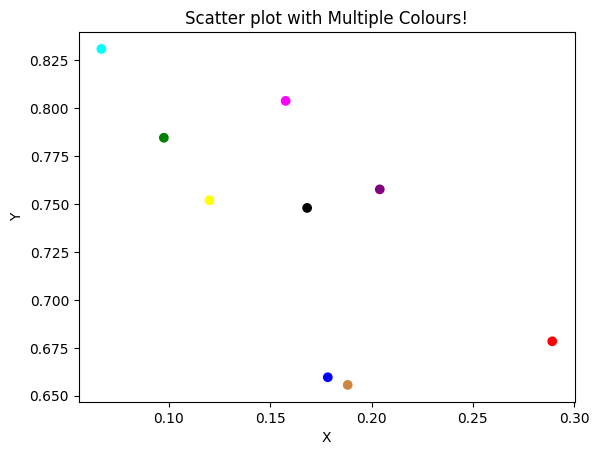

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define x, y, and colors for each point
langs = ["zho", "deu", "slk", "dan","srp", "hrv", "swe", "por", "rus"]
lang_sim = np.array([0.2892275292349139, 0.09745802098497958,0.17840613445904518, 0.11992176734660276,  0.2040809427572, 0.16819960814394186, 0.06658369264033626, 0.15760299761174978, 0.18824593690905445])
f1_score = np.array([0.6783899961, 0.7845509539, 0.6596356663, 0.7519294377, 0.7576419214, 0.747962178, 0.8308858361, 0.8037718904, 0.6556473829])

colors = ['red', 'green', 'blue', 'yellow', 'purple', "black", "cyan",  "magenta", "peru"]

# Create a scatter plot with multiple colors
plt.scatter(lang_sim, f1_score, c=colors)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with Multiple Colours!')

plt.show()

### Croatian model

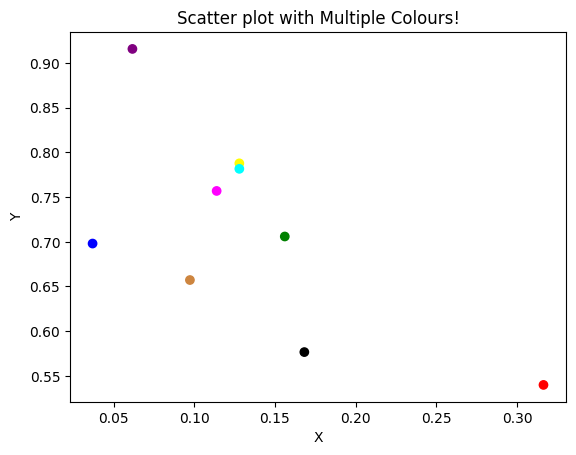

In [9]:
import matplotlib.pyplot as plt

# Define x, y, and colors for each point
langs = ["zho", "deu", "slk", "dan","srp", "eng", "swe", "por", "rus"]
lang_sim = [0.3164009272185251, 0.15607506120177872, 0.03696364326665014, 0.12791840072761895, 0.061656883182889866, 0.16819960814394186,0.12791840072761895, 0.11385305380179167, 0.09729243252260678]
f1_score = [0.5397840864, 0.7059352518, 0.6980351603, 0.7878103837,0.9158878505, 0.5765426284, 0.7816635161 ,  0.7569178374, 0.6571952337]

colors = ['red', 'green', 'blue', 'yellow', 'purple', "black", "cyan", "magenta", "peru"]

# Create a scatter plot with multiple colors
plt.scatter(lang_sim, f1_score, c=colors)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with Multiple Colours!')

plt.show()

### OLD STUFF BELOW (ignore)

In [5]:
# getting each language vector seperately 
eng = features["eng"]
zho = features["zho"]
deu = features["deu"]
pol = features["pol"]
slk = features["slk"]
dan = features["dan"]
rus = features["rus"]
tgl = features["tgl"]

Cosine distance to get the language similarity - cosine distance is inversely proportional to the language similarity i.e. smaller cosine distance = higher language similarity 

In [7]:
# cosine distance for english: 
eng_slk = distance.cosine(eng, slk)
eng_deu = distance.cosine(eng, deu)
eng_zho = distance.cosine(eng, zho)
eng_dan = distance.cosine(eng, dan)
eng_rus = distance.cosine(eng, rus)
eng_tgl = distance.cosine(eng, tgl)

print("Distance from polish to slovak", eng_slk)
print("Distance from english to german", eng_deu)
print("Distance from english to danish", eng_dan)
print("Distance from english to chinese", eng_zho)
print("Distance from english to russian", eng_rus)
print("Distance from english to tagalog", eng_tgl)


Distance from polish to slovak 0.17840613445904518
Distance from english to german 0.09745802098497958
Distance from english to danish 0.11992176734660276
Distance from english to chinese 0.2892275292349139
Distance from english to russian 0.18824593690905445
Distance from english to Tagalog 0.3911844526817908


In [8]:
# cosine distance for polish
pol_slk = distance.cosine(pol, slk)
pol_deu = distance.cosine(pol, deu)
pol_zho = distance.cosine(pol, zho)
pol_dan = distance.cosine(pol, dan)
pol_rus = distance.cosine(pol, rus)
pol_tgl = distance.cosine(pol, tgl)


print("Distance from polish to slovak", pol_slk)
print("Distance from polish to german", pol_deu)
print("Distance from polish to danish", pol_dan)
print("Distance from polish to chinese", pol_zho)
print("Distance from polish to russian", pol_rus)
print("Distance from polish to tagalog", pol_tgl)

Distance from polish to slovak 0.0842708838474282
Distance from polish to german 0.19994463093047998
Distance from polish to danish 0.17396681236909783
Distance from polish to chinese 0.33287561500500895
Distance from polish to russian 0.0714285714285714


In [9]:
# cosine distance for polish
tgl_slk = distance.cosine(tgl, slk)
tgl_deu = distance.cosine(tgl, deu)
tgl_zho = distance.cosine(tgl, zho)
tgl_dan = distance.cosine(tgl, dan)
tgl_rus = distance.cosine(tgl, rus)
tgl_eng = distance.cosine(tgl, eng)
tgl_pol = distance.cosine(tgl, pol)

print("Distance from tagalog to slovak", tgl_slk)
print("Distance from tagalog to german", tgl_deu)
print("Distance from tagalog to danish", tgl_dan)
print("Distance from tagalog to chinese", tgl_zho)
print("Distance from tagalog to russian", tgl_rus)
print("Distance from tagalog to english", tgl_eng)
print("Distance from tagalog to polish", tgl_pol)


Distance from tagalog to slovak 0.37344849947455616
Distance from tagalog to german 0.4352550335979859
Distance from tagalog to danish 0.4493112082460653
Distance from tagalog to chinese 0.4811254783372292
Distance from tagalog to russian 0.30952380952380953
Distance from tagalog to english 0.3911844526817908
Distance from tagalog to polish 0.33333333333333337


Exploring differnt vector types: lang2vec has vectors for differnet features of the languages, each representing them in differnet ways 


In [51]:
l2v.FEATURE_SETS

['syntax_wals',
 'phonology_wals',
 'syntax_sswl',
 'syntax_ethnologue',
 'phonology_ethnologue',
 'inventory_ethnologue',
 'inventory_phoible_aa',
 'inventory_phoible_gm',
 'inventory_phoible_saphon',
 'inventory_phoible_spa',
 'inventory_phoible_ph',
 'inventory_phoible_ra',
 'inventory_phoible_upsid',
 'syntax_knn',
 'phonology_knn',
 'inventory_knn',
 'syntax_average',
 'phonology_average',
 'inventory_average',
 'fam',
 'id',
 'geo',
 'learned']

In [ ]:
# phenology - how it sounds indivual bits 
# syntax - 

Distance between dan and eng: 0.11992176734660276
Distance between dan and zho: 0.32461836649402953
Distance between dan and deu: 0.0846742124087071
Distance between dan and slk: 0.13861919370516207
Distance between dan and tgl: 0.4493112082460653
Distance between dan and srp: 0.16395392330206904
Distance between dan and hrv: 0.12791840072761895


